# 2_priors

In [1]:
import numpy as np
from scipy.stats import uniform,beta,norm
import matplotlib.pyplot as plt
import pandas as pd

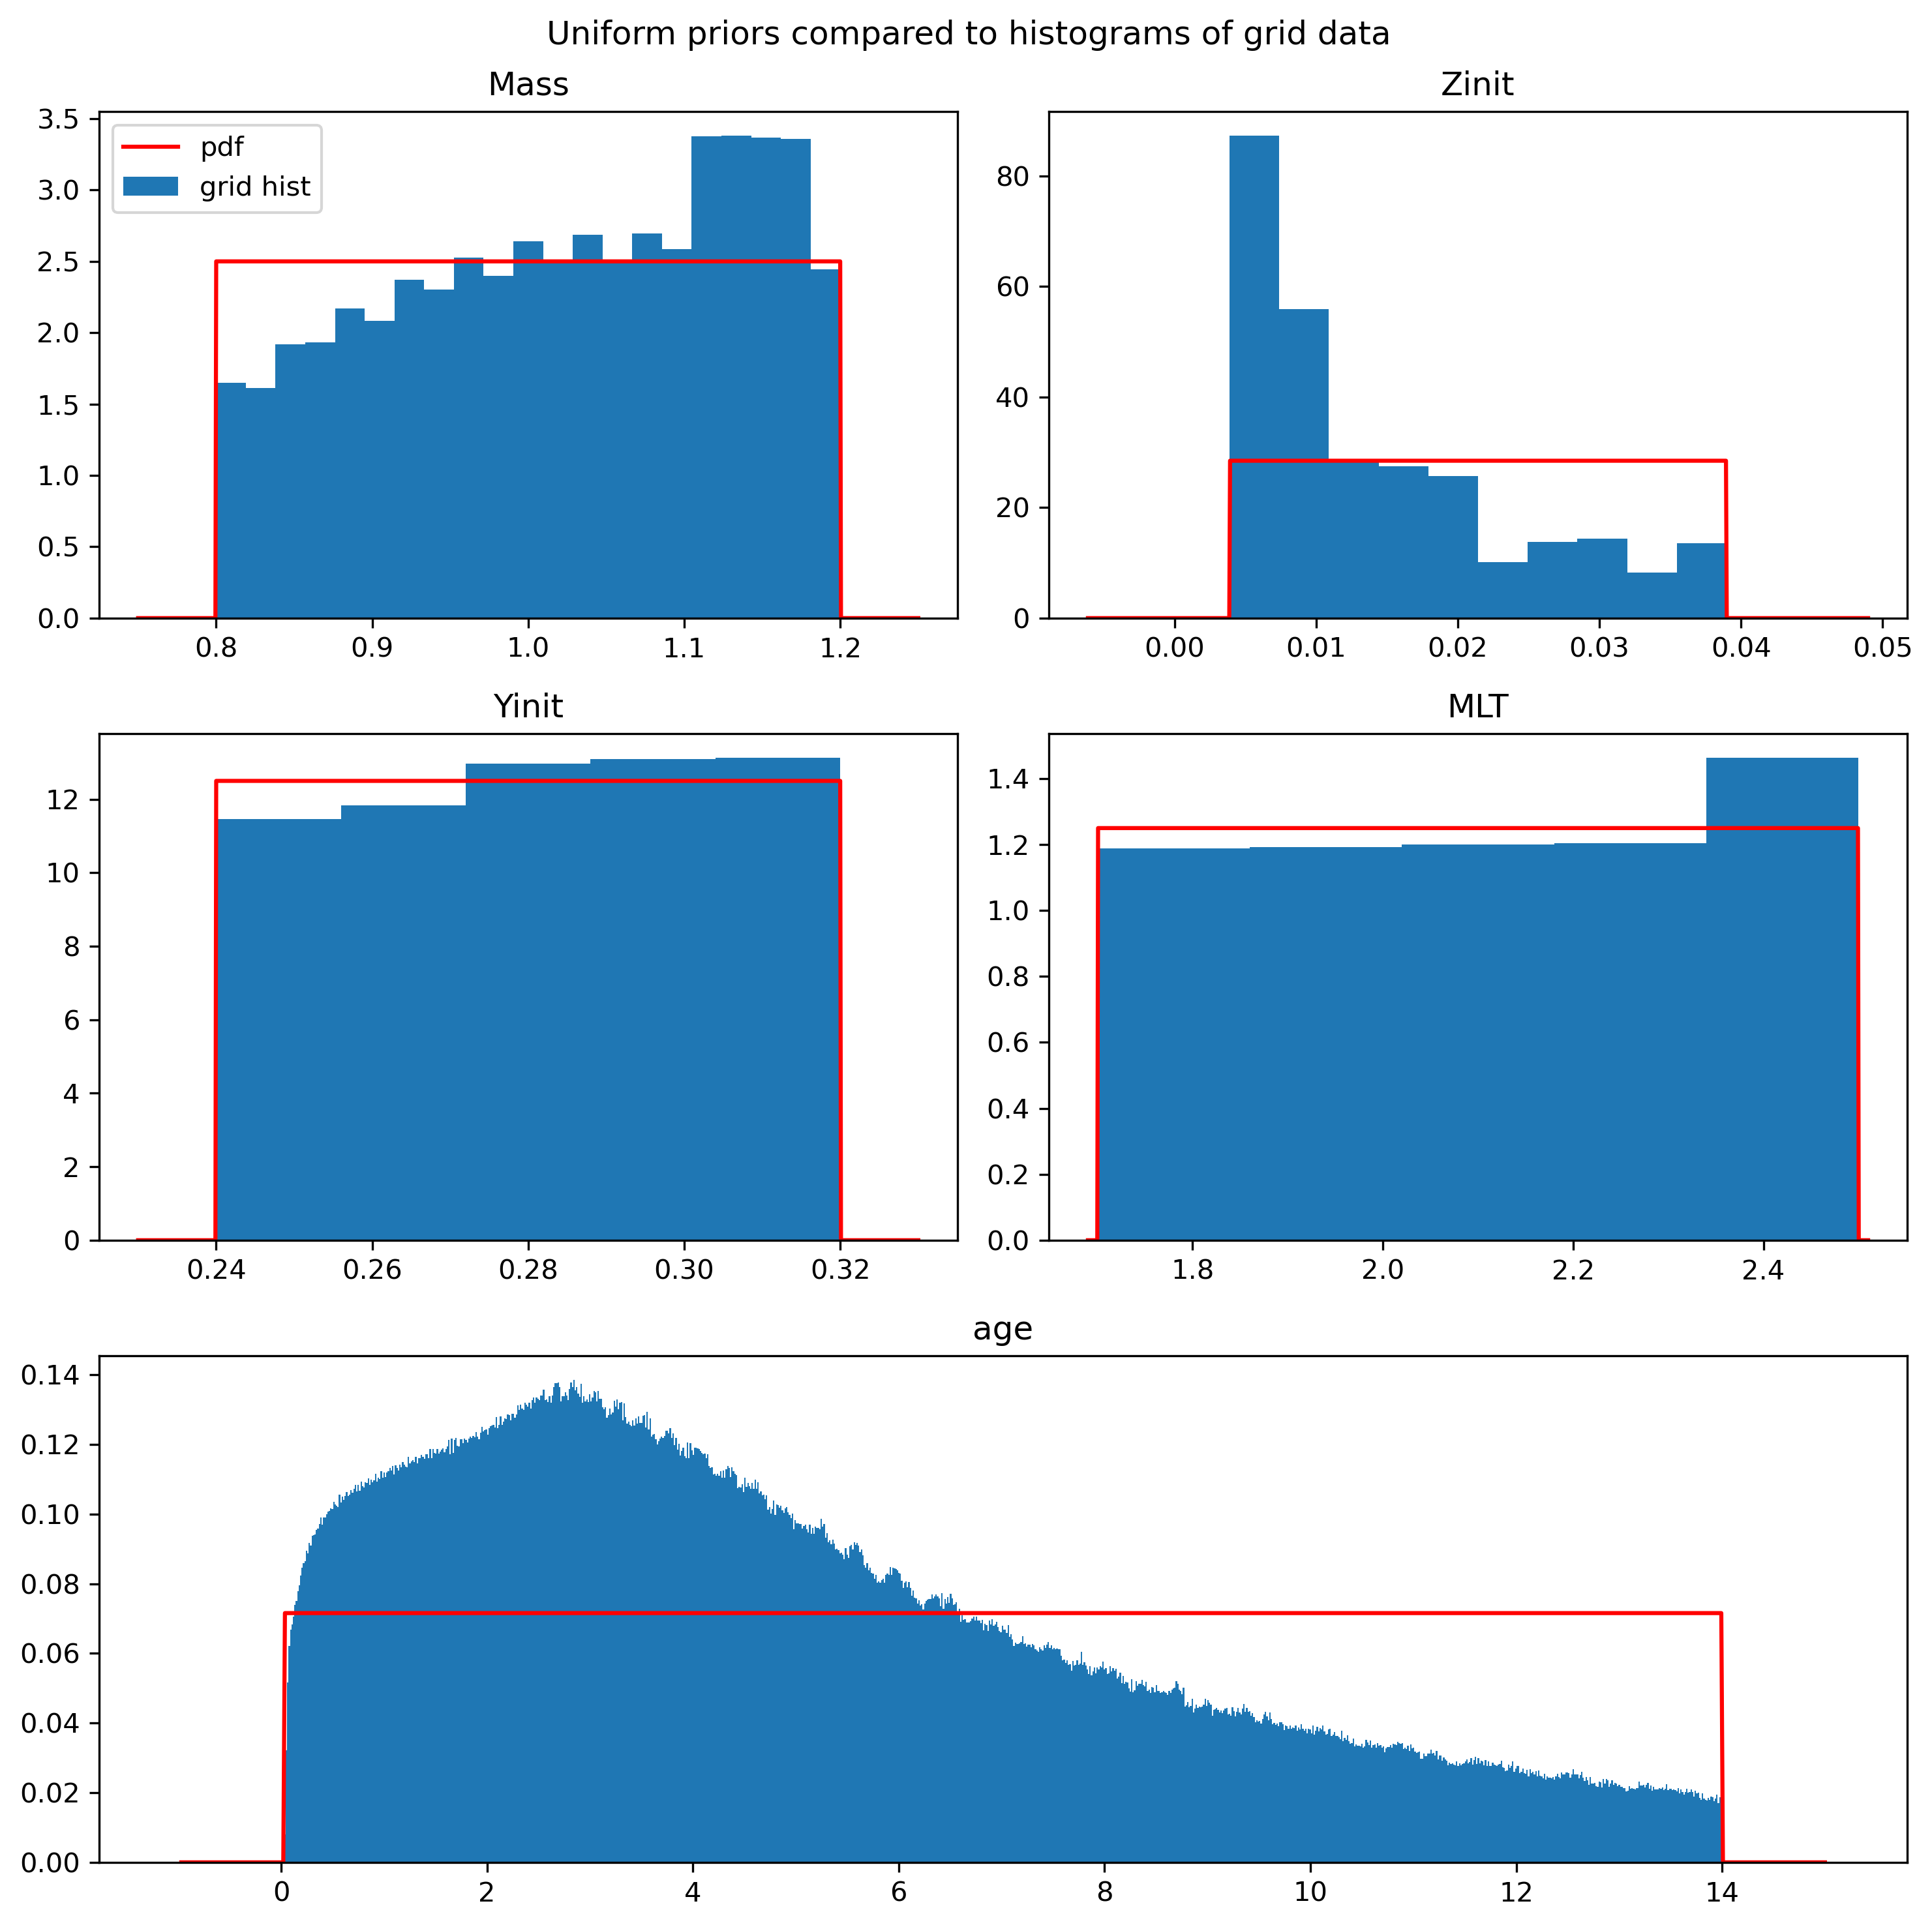

In [3]:
"""
load in data
"""

class UniformPrior:
    def __init__(self, scale_min, scale_max):
        """
        Initialise a uniform prior with minimum and maximum values as stated
        """
        self.scale_min = scale_min
        self.scale_max = scale_max

    def pdf(self, x):
        """
        Create pdf of specified uniform dist
        """
        if self.scale_min <= x <= self.scale_max:
            return 1 / (self.scale_max - self.scale_min)
        else:
            return 0.0

    def sample(self):
        """
        Sample from the defined prior
        """
        return np.random.uniform(self.scale_min, self.scale_max,1000)


df = pd.read_hdf('/home/oxs235/datastorage/repos_data/ojscutt/pitchfork/data/bob.h5', key='df') #change if accessing from RDS
fig = plt.figure(figsize = (10,10), dpi=300, layout="tight")

############ MASS
plt.subplot(3,2,1)
mass_prior = UniformPrior(scale_min=df["initial_mass"].min(), scale_max=df["initial_mass"].max())

hist, bins = np.histogram(df["initial_mass"], bins=21, range=(df["initial_mass"].min(), df["initial_mass"].max()), density=True)
bin_width = bins[1] - bins[0]

mass_prior_min = mass_prior.scale_min
mass_prior_max = mass_prior.scale_max

x_vals = np.linspace(mass_prior_min-0.05, mass_prior_max+0.05, 1000)

mass_prior_pdf = [mass_prior.pdf(x) for x in x_vals]

plt.bar(bins[:-1], hist, width=bin_width, align="edge", label="grid hist")
plt.plot(x_vals, mass_prior_pdf, color='red', label="pdf")
plt.legend()
plt.title("Mass")

############ METALLICITY
plt.subplot(3,2,2)
Zinit_prior = UniformPrior(scale_min=df["initial_Zinit"].min(), scale_max=df["initial_Zinit"].max())


hist, bins = np.histogram(df["initial_Zinit"], bins=10, range=(df["initial_Zinit"].min(), df["initial_Zinit"].max()), density=True)
bin_width = bins[1] - bins[0]

Zinit_prior_min = Zinit_prior.scale_min
Zinit_prior_max = Zinit_prior.scale_max

x_vals = np.linspace(Zinit_prior_min-0.01, Zinit_prior_max+0.01, 1000)

Zinit_prior_pdf = [Zinit_prior.pdf(x) for x in x_vals]

plt.bar(bins[:-1], hist, width=bin_width, align="edge", label="grid hist")
plt.plot(x_vals, Zinit_prior_pdf, color='red', label="pdf")
plt.title("Zinit")

############ HELIUM ABUNDANCE
plt.subplot(3,2,3)
Yinit_prior = UniformPrior(scale_min=df["initial_Yinit"].min(), scale_max=df["initial_Yinit"].max())

hist, bins = np.histogram(df["initial_Yinit"], bins=5, range=(df["initial_Yinit"].min(), df["initial_Yinit"].max()), density=True)
bin_width = bins[1] - bins[0]

Yinit_prior_min = Yinit_prior.scale_min
Yinit_prior_max = Yinit_prior.scale_max

x_vals = np.linspace(Yinit_prior_min-0.01, Yinit_prior_max+0.01, 1000)

Yinit_prior_pdf = [Yinit_prior.pdf(x) for x in x_vals]

plt.bar(bins[:-1], hist, width=bin_width, align="edge", label="grid hist")
plt.plot(x_vals, Yinit_prior_pdf, color='red', label="pdf")
plt.title("Yinit")

############ MLT
plt.subplot(3,2,4)

MLT_prior = UniformPrior(scale_min=df["initial_MLT"].min(), scale_max=df["initial_MLT"].max())

hist, bins = np.histogram(df["initial_MLT"], bins=5, range=(df["initial_MLT"].min(), df["initial_MLT"].max()), density=True)
bin_width = bins[1] - bins[0]

MLT_prior_min = MLT_prior.scale_min
MLT_prior_max = MLT_prior.scale_max

x_vals = np.linspace(MLT_prior_min-0.01, MLT_prior_max+0.01, 1000)

MLT_prior_pdf = [MLT_prior.pdf(x) for x in x_vals]

plt.bar(bins[:-1], hist, width=bin_width, align="edge", label="grid hist")
plt.plot(x_vals, MLT_prior_pdf, color='red', label="pdf")
plt.title("MLT")

############ AGE
plt.subplot(3,2,(5,6))

age_prior = UniformPrior(scale_min=df["star_age"].min(), scale_max=df["star_age"].max())

hist, bins = np.histogram(df["star_age"], bins=1000, range=(df["star_age"].min(), df["star_age"].max()),density=True)
bin_width = bins[1] - bins[0]

age_prior_min = age_prior.scale_min
age_prior_max = age_prior.scale_max

x_vals = np.linspace(age_prior_min-1, age_prior_max+1, 1000)

age_prior_pdf = [age_prior.pdf(x) for x in x_vals]

plt.bar(bins[:-1], hist, width=bin_width, align="edge", label="grid hist")
plt.plot(x_vals, age_prior_pdf, color='red', label="pdf")
plt.title("age")

plt.suptitle("Uniform priors compared to histograms of grid data")
#plt.savefig("/home/oxs235/repos/ojscutt/pcann_inference/figs/uniform_priors_grid.pdf")
plt.show()